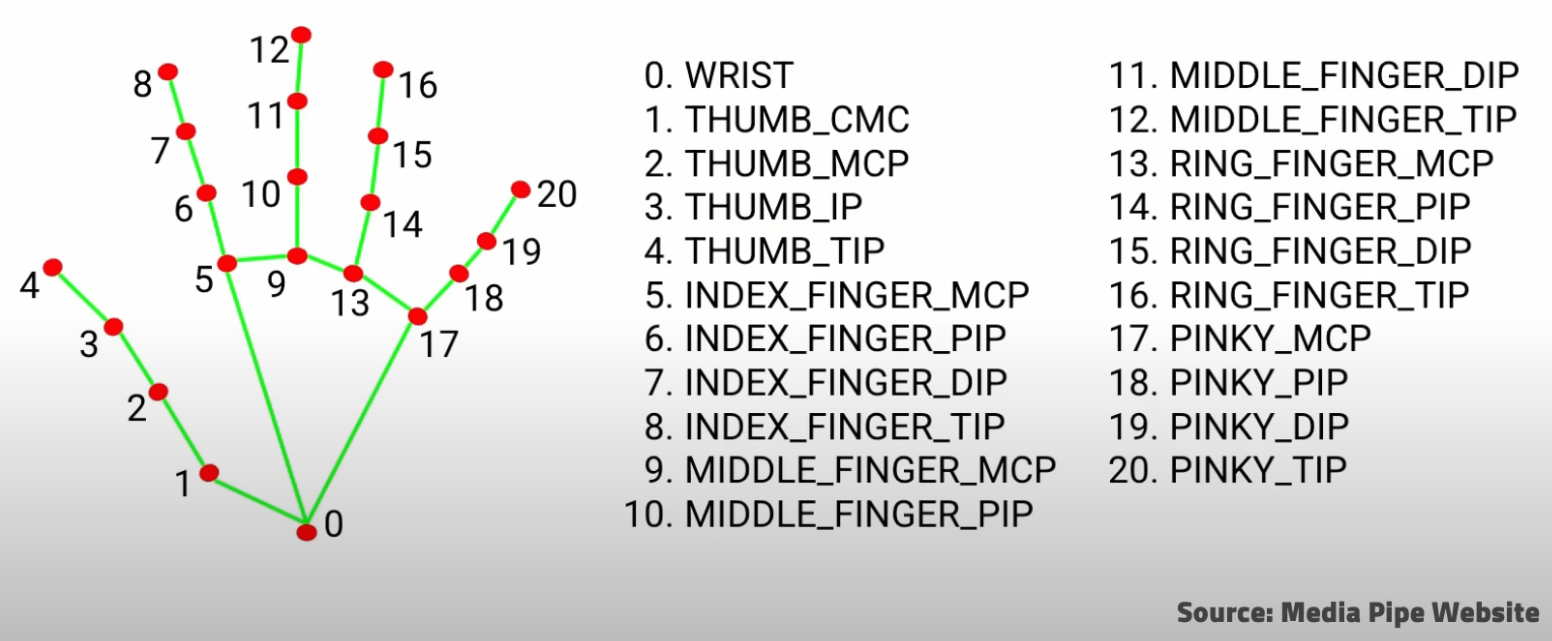

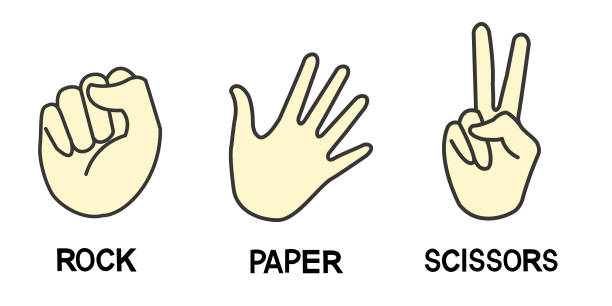

Basandonos en la logica vista en el notebook **FingerCounter**, podemos hacer el clásico juego Rock Paper Scissors

In [2]:
import cv2 
import mediapipe as mp

In [ ]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

# Devuelve un array de 5 posiciones con 1s en los dedos levantados
# Siendo el pulgar el dedo 0 y el meñique el dedo 1
def getFingersUp(hand):
    puntasDedos = [8, 12, 16, 20] # Excluimos el pulgar
    fingers = []
    
    if hand.landmark[4].x > hand.landmark[2].x : fingers.append(1)
    else: fingers.append(0)
    
    for id in range (4):
        if hand.landmark[puntasDedos[id]].y < hand.landmark[puntasDedos[id]-2].y:
            fingers.append(1)
        else:
            fingers.append(0)
    
    return fingers

def winGame(fingers):
    if fingers == [0, 1, 1, 0, 0]: # User = Tijera
        return "Piedra"
    elif fingers == [1, 1, 1, 1, 1]: # User = Papel
        return "Tijeras"
    else:
        return "Papel"

while True:
    succes, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(imgRGB) 
    #print(result.multi_hand_landmarks) # Nos da las coordenadas del resultado encontrado, en nuestro caso, la mano
    
    if result.multi_hand_landmarks:
        for hand in result.multi_hand_landmarks:
            fingers = getFingersUp(hand)
            botSelction = winGame(fingers)
            cv2.putText(img, botSelction, (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3) # Muestra los dedos levantados
            mpDraw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS)

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break
    
cap.release()
cv2.destroyAllWindows()